## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:

In [1]:
from tensorflow.keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28 x 28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

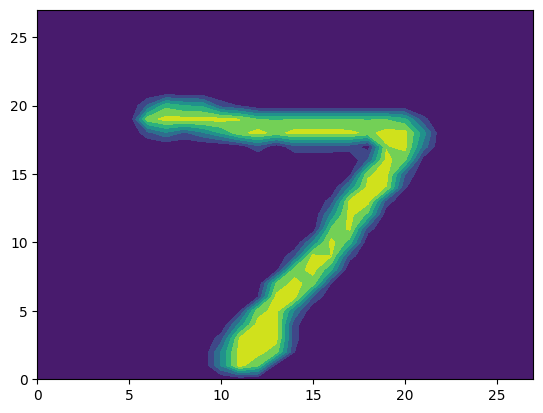

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

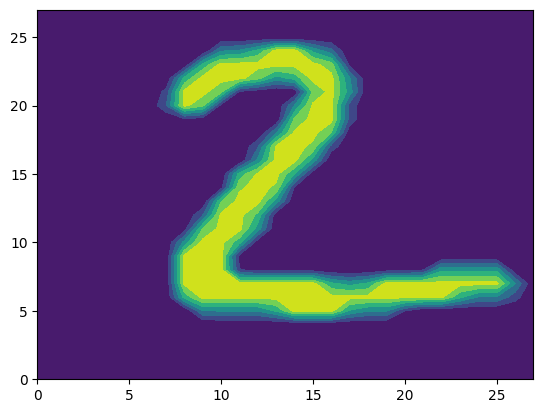

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

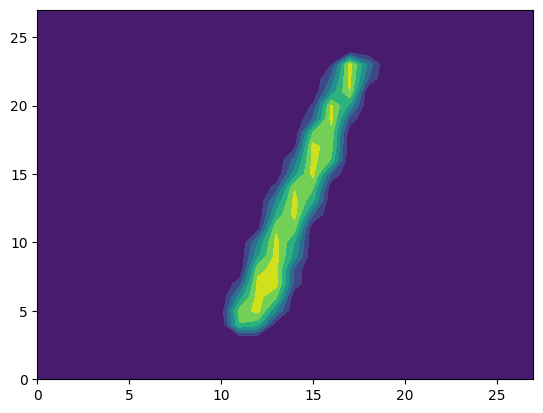

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

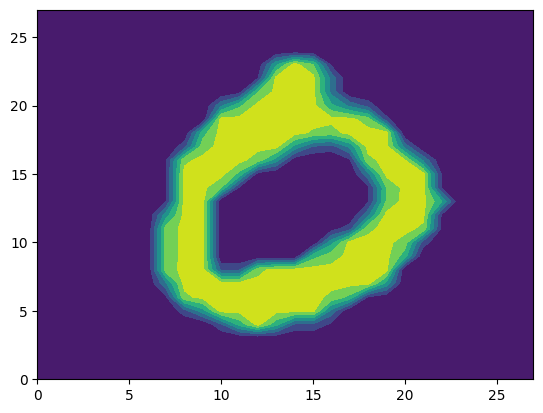

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

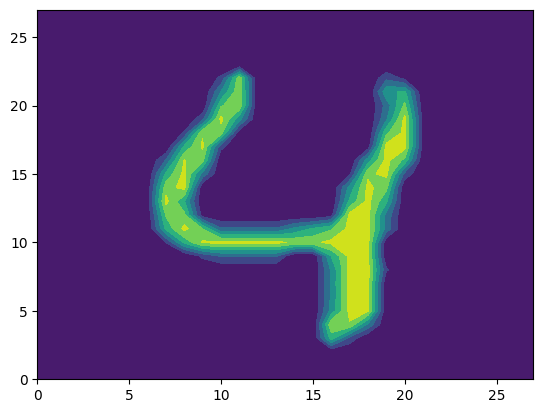

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?

The shape of `X_train` is (60000, 28, 28) and the shape of `X_test` is (10000, 28, 28). Every X_train and X_test has the same shape of (28, 28). `y_train` has a shape of (60000,) and `y_test` has a shape of (10000,).

In [3]:
# shape of X_train
print("X_train: " , X_train.shape)

# shape of X_test
print("\nX_test: " , X_test.shape)

# shape of X_train[i]
print("")
for i in range(5):
    print("X_train [" , i , "]: " , X_train[i].shape)

# shape of X_test[i]
print("")
for i in range(5):
    print("X_test [" , i , "]: " , X_test[i].shape)

# shape of y_train
print("\ny_train: " , y_train.shape)

# shape of y_test
print("\ny_test: " , y_test.shape)

X_train:  (60000, 28, 28)

X_test:  (10000, 28, 28)

X_train [ 0 ]:  (28, 28)
X_train [ 1 ]:  (28, 28)
X_train [ 2 ]:  (28, 28)
X_train [ 3 ]:  (28, 28)
X_train [ 4 ]:  (28, 28)

X_test [ 0 ]:  (28, 28)
X_test [ 1 ]:  (28, 28)
X_test [ 2 ]:  (28, 28)
X_test [ 3 ]:  (28, 28)
X_test [ 4 ]:  (28, 28)

y_train:  (60000,)

y_test:  (10000,)


3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).

In [4]:
# reshape X_test when N = 10000 observations
X_test_reshaped = X_test.reshape(X_test.shape[0], 784) 

# reshape X_train when N = 60000 observations
X_train_reshaped = X_train.reshape(X_train.shape[0], 784)  # Shape: (60000, 784)

4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.

The optimal number of neighbors k is 3. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
# reduce sample size to 20000 for speed/efficiency 
sample_size = 20000  
indices = np.random.choice(X_train_reshaped.shape[0], sample_size, replace=False)
X_train_small, y_train_small = X_train_reshaped[indices], y_train[indices]

# use even smaller test set, 2000 samples 
X_test_small, y_test_small = X_test_reshaped[:2000], y_test[:2000]  

# number of k values to try
k_bar = 10

# list to store accuracies of k 
accuracies = []

# Loop through different values of k
for k in range(1, k_bar + 1):    
    # create kNN model
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # train the model on smaller data set -> X_train_reshaped and y_train
    model.fit(X_train_small, y_train_small) 
    # predict on smaller test set 
    y_pred = model.predict(X_test_small) 
    # compute accuracy 
    acc = accuracy_score(y_test_small, y_pred) 
    # append accuracy to accuracies list 
    accuracies.append(acc)
    
# find optimal k by taking index of highest accuracy 
optimal_k = np.argmax(accuracies) + 1
print(f"Optimal k: {optimal_k}")

Optimal k: 1


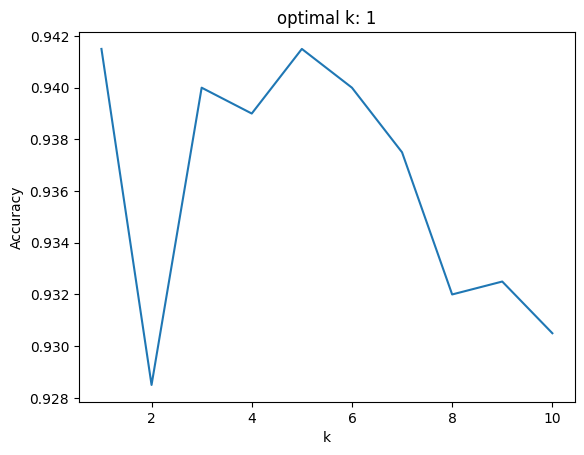

In [7]:
# plot accuracy by k
plt.plot(np.arange(1,k_bar+1),accuracies) 
plt.xlabel("k")
plt.title("optimal k: "+str(optimal_k))
plt.ylabel('Accuracy')
plt.show()

5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.

The predictor performs pretty well on the test set, considering its accuracy is 0.93. Models with an accuracy above 0.9 are usually considered effective models. There are high numbers along the diagonal in the confusion matrix, indicating that the predictor performed decently well when classifying digits. 

In [8]:
from sklearn.metrics import confusion_matrix

# retrieve precomputed accuracy for optimal k
best_accuracy = accuracies[optimal_k] 

# train kNN with the optimal k 
best_model = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
best_model.fit(X_train_small, y_train_small)

# predict on smaller test set 
y_pred_best = best_model.predict(X_test_small)

# print previously computed accuracy
print("Accuracy for k =" ,optimal_k , "is:" , best_accuracy)

# compute confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred_best)
# print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy for k = 1 is: 0.9285

Confusion Matrix:
[[173   0   0   0   0   0   2   0   0   0]
 [  0 232   1   0   0   1   0   0   0   0]
 [  2   2 209   1   0   0   0   5   0   0]
 [  0   0   1 196   0   2   0   4   3   1]
 [  0   3   0   0 200   0   1   1   1  11]
 [  0   0   0   6   1 166   1   1   1   3]
 [  1   0   0   0   1   1 174   0   1   0]
 [  0   9   1   1   1   0   0 189   0   4]
 [  3   0   2   8   2   5   1   1 166   4]
 [  1   0   0   2   5   1   0   4   3 178]]


6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

For the confusion matrix, mistakes were most likely for the digits "2", "4", "8", and "9" . These had lower numbers along the diagonal, but more importantly, they had more numbers in the other rows. These numbers in the other rows signify that the digit was misclassified as the number of that column. Looking at the amount of nonzero numbers in the spaces that aren't along a diagonal, we can see that the digits "2", "4", "8", and "9". An interesting pattern is that the digits that have been misclassified the most as ones that have curves and look similar to other digits. 

7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

To represent a color photo in matrix form, you could represent it by its height by width and RGB values. To convert it into tabular data, every pixel in the photo could be represented as one row in the data set. The columns for this table would then be the x value, the y value, the R amount, the G amount, and the B amount. There would be the same number of rows as there are number of pixels in the photo. 